In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### one easy way by using Pandas: (mean normalization)

normalized_df=(df-df.mean())/df.std()

#### or to use min-max normalization:

normalized_df=(df-df.min())/(df.max()-df.min())

#### or use my own defined min-max normalization function:

In [26]:
def NormalizeData(data):

    return (data - np.min(data)) / (np.max(data) - np.min(data))

#### change HospAdmTime from negative to positive
train.HospAdmTime = -1 * train.HospAdmTime


### Processing training data:

In [54]:
train = pd.read_csv("../data/setB_training_early.psv", sep='|')
print(train.shape)
#print(train)
#drop columns which have more than 94% NaN's by index
#cols = [7,14,16,20,22,26,27,32]
cols = [7]
train.HospAdmTime = -1 * train.HospAdmTime
train=train.drop(train.columns[cols],axis=1)

train[np.isnan(train)] = -99
#test=test.fillna(-99, inplae=True)
#replace NaN with mean/median
#test=test.fillna(test.mean(), inplace=True)
#test=test.fillna(test.median(), inplace=True)
#for back-fill
#train.fillna(method='bfill', inplace=True)
#for forward-fill
#train.fillna(method='ffill', inplace=True)
train=train.values

(3458, 41)


### Processing test data:

In [55]:
test = pd.read_csv("../data/setB_test_early.psv", sep='|')
#train, test = train_test_split(train, test_size=0.2)
#print(train.shape)
#print(train)
test.HospAdmTime = -1 * test.HospAdmTime
test=test.drop(test.columns[cols],axis=1)

test[np.isnan(test)] = -99
#test=test.fillna(-99, inplae=True)
#replace NaN with mean/median
#test=test.fillna(test.mean(), inplace=True)
#test=test.fillna(test.median(), inplace=True)
#for back-fill
#train.fillna(method='bfill', inplace=True)
#for forward-fill
#train.fillna(method='ffill', inplace=True)
test=test.values

#train, test = train_test_split(train, test_size=0.2)
#print(train.shape)
#print(train)


### Splitting training and test data into x (features) and y (sepsisLabel):

In [57]:
x_train_raw = train[:, :-1] # for all but last column (sepsis label)
n_rows, n_cols = x_train_raw.shape

x_test_raw = test[:, :-1]
y_train = train[:, -1]  # for last column (sepsis label)
y_test = test[:, -1]  # for last column

### Defining NN architecture:

In [58]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(n_cols,)),
#    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])
keras.optimizers.Adam(lr = 0.001) #for gradient descent
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Normalize Data:

In [59]:
x_train = NormalizeData(x_train_raw)
x_test = NormalizeData(x_test_raw)
#x_train = x_train_raw
#x_test = x_test_raw
print(x_test)
print(y_test)

[[0.11963641 0.13300361 0.         ... 0.06683598 0.27662746 0.07084614]
 [0.11295281 0.12899345 0.09069643 ... 0.06616762 0.08743483 0.09290202]
 [0.11629461 0.13300361 0.09056276 ... 0.06683598 0.16789199 0.09223366]
 ...
 [0.14637081 0.13300361 0.09230049 ... 0.06683598 0.06619436 0.1664216 ]
 [0.14369737 0.13300361 0.09209999 ... 0.06616762 0.06616762 0.08087154]
 [0.11997059 0.12899345 0.         ... 0.06683598 0.06616762 0.11362117]]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0.

In [47]:
model.fit(x_train, y_train, epochs=200)
classifications = model.predict(x_test)
print(classifications)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss, test_acc)

Epoch 1/200
3458/3458 [==============================] - 1s 191us/step - loss: 0.6852 - acc: 0.5628
Epoch 2/200
3458/3458 [==============================] - 0s 70us/step - loss: 0.6706 - acc: 0.6645
Epoch 3/200
3458/3458 [==============================] - 0s 56us/step - loss: 0.6479 - acc: 0.7354
Epoch 4/200
3458/3458 [==============================] - 0s 57us/step - loss: 0.6194 - acc: 0.7808
Epoch 5/200
3458/3458 [==============================] - 0s 73us/step - loss: 0.5858 - acc: 0.7854
Epoch 6/200
3458/3458 [==============================] - 0s 55us/step - loss: 0.5517 - acc: 0.7944
Epoch 7/200
3458/3458 [==============================] - 0s 55us/step - loss: 0.5218 - acc: 0.8008
Epoch 8/200
3458/3458 [==============================] - 0s 72us/step - loss: 0.4963 - acc: 0.8068
Epoch 9/200
3458/3458 [==============================] - 0s 55us/step - loss: 0.4755 - acc: 0.8167
Epoch 10/200
3458/3458 [==============================] - 0s 60us/step - loss: 0.4592 - acc: 0.8175
Epoch 11

3458/3458 [==============================] - 0s 81us/step - loss: 0.2709 - acc: 0.9063
Epoch 84/200
3458/3458 [==============================] - 0s 95us/step - loss: 0.2705 - acc: 0.9054
Epoch 85/200
3458/3458 [==============================] - 0s 59us/step - loss: 0.2684 - acc: 0.9092
Epoch 86/200
3458/3458 [==============================] - 0s 55us/step - loss: 0.2668 - acc: 0.9069
Epoch 87/200
3458/3458 [==============================] - 0s 84us/step - loss: 0.2658 - acc: 0.9078
Epoch 88/200
3458/3458 [==============================] - 0s 60us/step - loss: 0.2643 - acc: 0.9095
Epoch 89/200
3458/3458 [==============================] - 0s 63us/step - loss: 0.2635 - acc: 0.9098
Epoch 90/200
3458/3458 [==============================] - 0s 65us/step - loss: 0.2618 - acc: 0.9109
Epoch 91/200
3458/3458 [==============================] - 0s 73us/step - loss: 0.2604 - acc: 0.9106
Epoch 92/200
3458/3458 [==============================] - 0s 57us/step - loss: 0.2590 - acc: 0.9092
Epoch 93/200


3458/3458 [==============================] - 0s 54us/step - loss: 0.2127 - acc: 0.9228
Epoch 165/200
3458/3458 [==============================] - 0s 53us/step - loss: 0.2122 - acc: 0.9239
Epoch 166/200
3458/3458 [==============================] - 0s 72us/step - loss: 0.2123 - acc: 0.9219
Epoch 167/200
3458/3458 [==============================] - 0s 63us/step - loss: 0.2115 - acc: 0.9225
Epoch 168/200
3458/3458 [==============================] - 0s 60us/step - loss: 0.2116 - acc: 0.9231
Epoch 169/200
3458/3458 [==============================] - 0s 59us/step - loss: 0.2113 - acc: 0.9225
Epoch 170/200
3458/3458 [==============================] - 0s 67us/step - loss: 0.2111 - acc: 0.9225
Epoch 171/200
3458/3458 [==============================] - 0s 77us/step - loss: 0.2102 - acc: 0.9222
Epoch 172/200
3458/3458 [==============================] - 0s 67us/step - loss: 0.2098 - acc: 0.9225
Epoch 173/200
3458/3458 [==============================] - 0s 55us/step - loss: 0.2100 - acc: 0.9239
Epoc

872/872 [==============================] - 0s 168us/step
0.42648170437287847 0.9059633027522935


In [48]:
# predict probabilities for test set
y_predict_probs = model.predict(x_test, verbose=0)
# predict crisp classes for test set
y_predict_classes = model.predict_classes(x_test, verbose=0)

In [49]:
#np.set_printoptions(threshold=np.inf)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [50]:
# reduce to 1d array
y_probs = y_predict_probs[:, 0]
y_classes = y_predict_classes[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_classes)
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, y_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
print('Confusion_matrix:')
print('                    TrueP FalseN')
print('                    FalseP TrueN')
#labels must be specified as [1,0]. Without it, confusion_matrix
#will report negative on the 1st row then positives on the 2nd row
#note: predictions are in columns and actual values in rows !!
matrix = confusion_matrix(y_test, y_classes, labels=[1, 0])
print(matrix)

Accuracy: 0.905963
Precision: 0.903361
Recall: 0.922747
F1 score: 0.912951
Cohens kappa: 0.810732
ROC AUC: 0.956791
Confusion_matrix:
                    TrueP FalseN
                    FalseP TrueN
[[430  36]
 [ 46 360]]


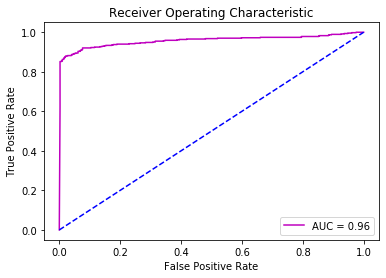

In [51]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_probs)
roc_auc = metrics.auc(fpr, tpr)
# plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'm', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
